## Loading a polarized optical microscope (POM) image

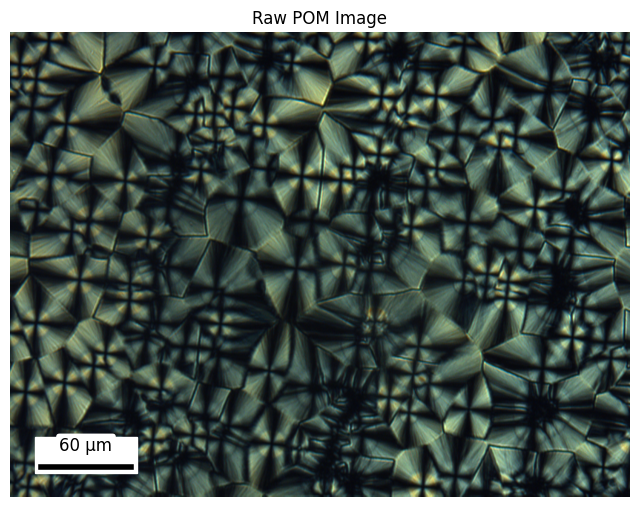

In [4]:
import sys
sys.path.append("../../src/data_loading")  # Ensure Python finds the module

import image_loader

# Define image path
image_path = "../../data/raw/S33.tif"

# Load the raw POM image
raw_image = image_loader.load_pom_image(image_path)

# Display the POM image with a scale bar included
sys.path.append("../../src/visualization")  # Ensure Python finds the module
import image_with_scale_bar

image_with_scale_bar.display_image(raw_image, title = "Raw POM Image")


## Preprocessing the image

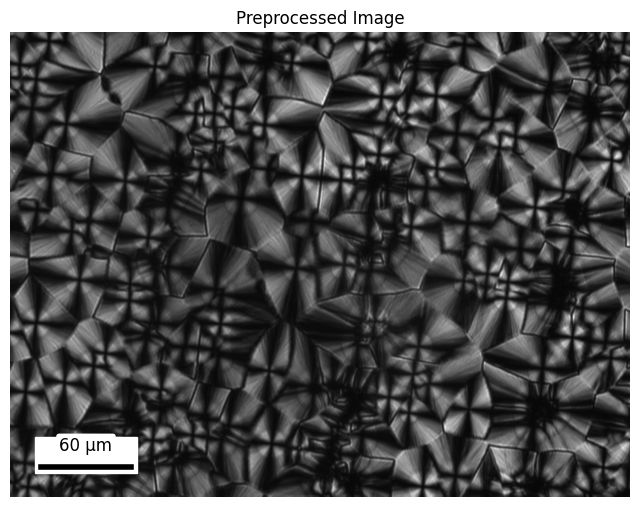

In [5]:
sys.path.append("../../src/preprocessing")  # Ensure Python finds the module

import preprocessing

# Converting the image to grayscale
preprocessed = preprocessing.GrayConverter.convert_to_gray(raw_image)

# Applying histogram equalization (optional if contrast is low and Otsu's thresholding performance must be improved)
# preprocessed = preprocessing.GrayConverter.equalize_histogram(preprocessed)

# # Reducing noise with a Gaussian blur (optional if fine details are considered as noise)
# preprocessed = preprocessing.apply_gaussian_blur(preprocessed)

# # Compute gradient magnitude to highlight edges in the preprocessed image
# preprocessed = preprocessing.compute_gradient_magnitude(preprocessed)

# # # Apply automatic thresholding using Otsu's thresholding
# # preprocessed = preprocessing.apply_otsu_thresholding(preprocessed)

# # # Applying morphological opening to refine the segmentation regions (optional if small background noise needs to be removed)
# # # Default kernel size is 3x3, default number of iterations is 2.
# # preprocessed = preprocessing.apply_morphological_opening(preprocessed, kernel_size=3)

# # Adding markers to identify each region during the watershed algorithm
# preprocessed = preprocessing.compute_markers(preprocessed)

# Display with preprocessed image
image_with_scale_bar.display_image(preprocessed, title="Preprocessed Image")


## Image segmentation using watershed algorithm

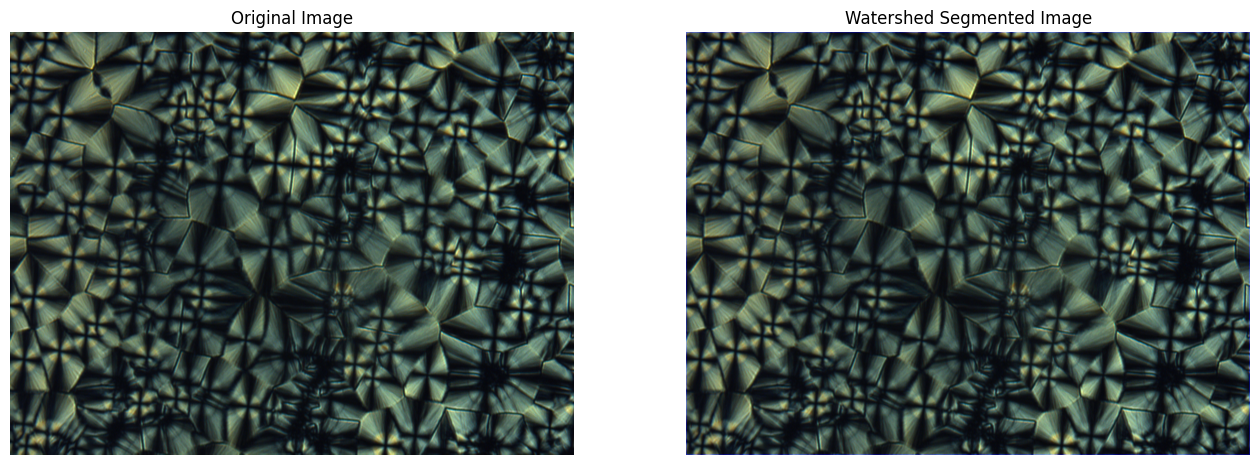

In [6]:
sys.path.append("../../src/segmentation")  # Ensure Python finds the module

import watershed_segmentation

# Applying watershed segmentation
segmented_image = watershed_segmentation.apply_watershed(raw_image, preprocessed)

# Display the result
watershed_segmentation.display_watershed_result(raw_image, segmented_image)